# Course 6 Lab 10 - Analyzing real world data with sql and python
## Socioeconomic indicators in Chicago

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In [35]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
#!pip install --user --force-reinstall ibm_db ibm_db_sa
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
#!pip install --user sqlalchemy==1.4.40
#!pip install --user ipython-sql

In [36]:
from dotenv import load_dotenv
import os
# reads the env file in our repository
load_dotenv()

True

In [37]:
import ibm_db
import ibm_db_sa
import sqlalchemy
from sqlalchemy import *
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [38]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
dsn_hostname = os.environ.get("HOSTNAME")     
dsn_uid = os.environ.get("USERNAME")      
dsn_pwd = os.environ.get("PASSWORD")

%sql ibm_db_sa://{dsn_uid}:{dsn_pwd}@{dsn_hostname}:31249/bludb;security=SSL



In [39]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql --append chicago_socioeconomic_data

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL


'Persisted chicago_socioeconomic_data'

In [40]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [41]:
# how many rows are in the dataset
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


1
390


In [42]:
# How many community areas in chicago have a hardship index greater than 50.0
%sql SELECT COUNT("ca") FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


1
190


In [43]:
# what is the maximum value of harship index in the dataset
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


1
98.0


In [44]:
# which community area has the highest hardship index
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (select max(hardship_index) from chicago_socioeconomic_data);

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


community_area_name
Riverdale
Riverdale
Riverdale
Riverdale
Riverdale


In [45]:
# which chicago community areas have per-capita incomes greater than $60000
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ >60000;

 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop
Lake View
Lincoln Park
Near North Side
Loop
Lake View
Lincoln Park


 * ibm_db_sa://myb97303:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/bludb;security=SSL
Done.


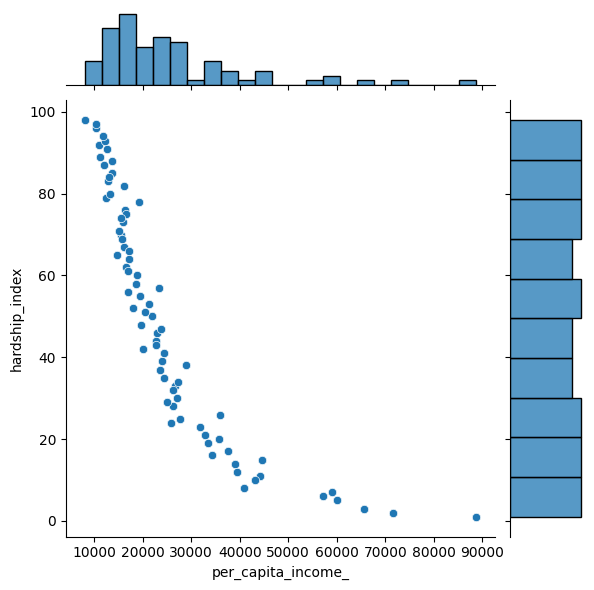

In [46]:
# create a scatter plot using the variables per_capita_income and hardship_index, explain the correlation between the two variables
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

### Explanation:  
Per capita income rises as hardship index decreases. The points on the scatterplot are somewhat close to a straightline in the negative direction, therefore the two variables are negatively correlated.